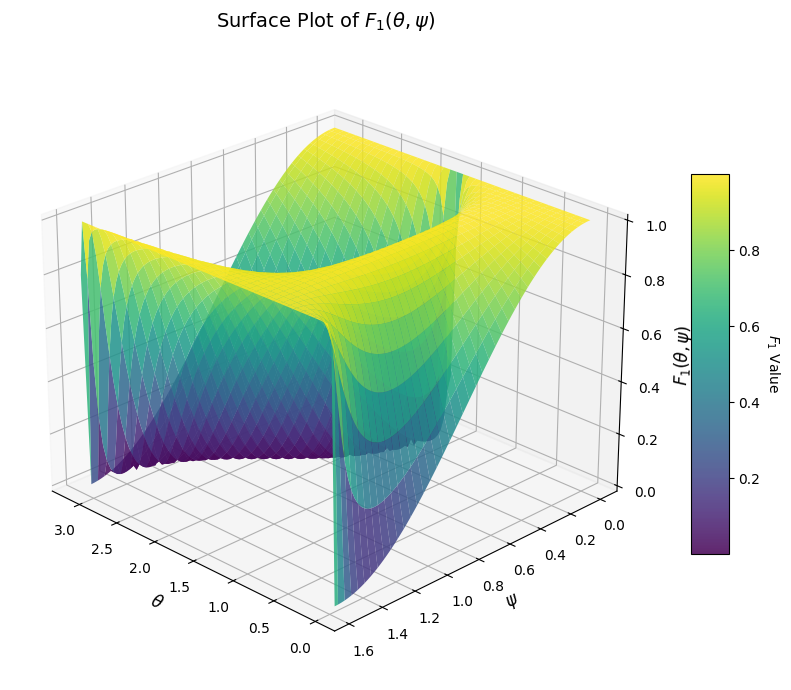

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def F1(theta, psi):
    a = np.cos(theta) * np.cos(psi)**2
    b = np.sin(theta) * np.sin(psi)**2
    numerator = (a + b)**2
    denominator = (np.cos(psi)**2 * np.cos(theta)**2 + 
                   np.sin(psi)**2 * np.sin(theta)**2)
    # Avoid division by zero by setting to NaN where denominator is zero
    return np.divide(numerator, denominator, out=np.full_like(numerator, np.nan), where=denominator!=0)

# Parameter ranges
theta = np.linspace(0, np.pi, 80)
psi = np.linspace(0, np.pi/2, 80)
Theta, Psi = np.meshgrid(theta, psi)
Z = F1(Theta, Psi)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta, Psi, Z, cmap='viridis', alpha=0.85, 
                       linewidth=0.5, antialiased=True)

# Labels and title
ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\psi$', fontsize=12)
ax.set_zlabel(r'$F_1(\theta, \psi)$', fontsize=12)
ax.set_title(r'Surface Plot of $F_1(\theta, \psi)$', pad=15, fontsize=14)

# Colorbar
cbar = fig.colorbar(surf, shrink=0.6, aspect=10)
cbar.set_label(r'$F_1$ Value', rotation=270, labelpad=15)

# Adjust view
ax.view_init(elev=25, azim=135)
plt.tight_layout()
plt.show()

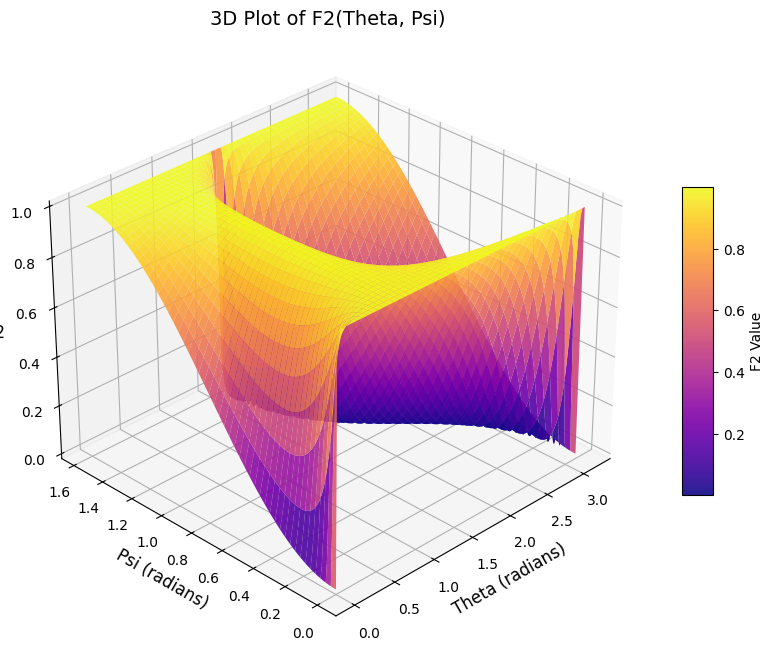

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define F2 function
def F2(theta, psi):
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    sin_psi = np.sin(psi)
    cos_psi = np.cos(psi)
    
    numerator = (sin_theta**2 * cos_psi**4 + cos_theta**2 * sin_psi**4 + 
                 np.sin(2*theta) * cos_psi**2 * sin_psi**2)
    denominator = sin_theta**2 * cos_psi**2 + cos_theta**2 * sin_psi**2
    
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-10
    return numerator / (denominator + epsilon)

# Generate theta and psi values
theta_vals = np.linspace(0, np.pi, 200)
psi_vals = np.linspace(0, np.pi/2, 200)
Theta, Psi = np.meshgrid(theta_vals, psi_vals)
F2_vals = F2(Theta, Psi)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta, Psi, F2_vals, cmap='plasma', edgecolor='none', alpha=0.9)

# Add color bar for better visualization
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='F2 Value')

# Labels and title
ax.set_xlabel("Theta (radians)", fontsize=12)
ax.set_ylabel("Psi (radians)", fontsize=12)
ax.set_zlabel("F2", fontsize=12)
ax.set_title("3D Plot of F2(Theta, Psi)", fontsize=14)
ax.view_init(elev=30, azim=225)  # Adjust viewing angle for better perspective

# Show the plot
plt.show()

C:\Users\Master\AppData\Local\Temp\ipykernel_2480\2599889694.py:28: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


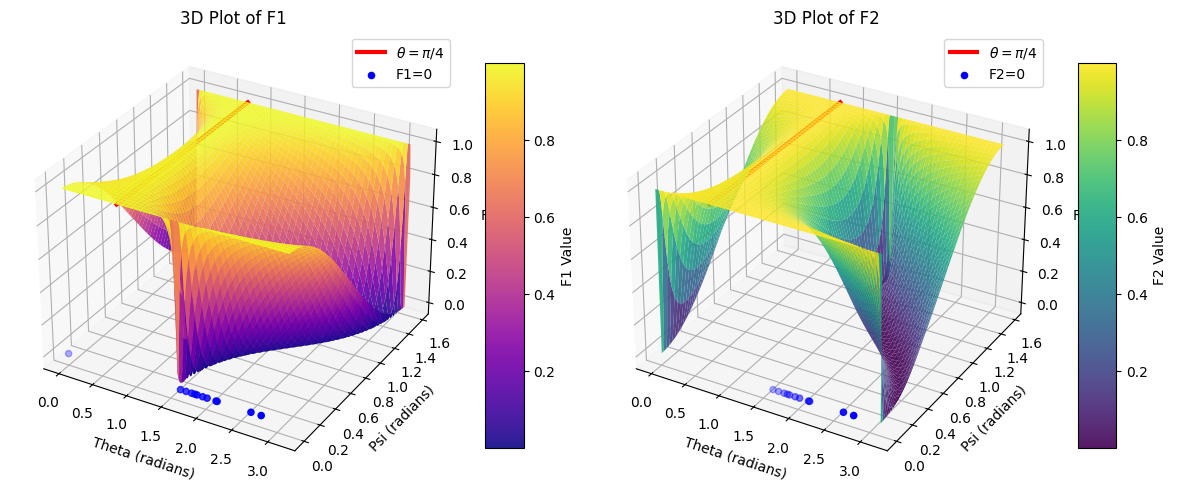

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define F1 function
def F1(theta, psi):
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    sin_psi = np.sin(psi)
    cos_psi = np.cos(psi)
    
    numerator = (cos_theta**2 * cos_psi**4 + sin_theta**2 * sin_psi**4 + 
                 np.sin(2*theta) * cos_psi**2 * sin_psi**2)
    denominator = cos_theta**2 * cos_psi**2 + sin_theta**2 * sin_psi**2
    
    return numerator / denominator

# Define F2 function
def F2(theta, psi):
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    sin_psi = np.sin(psi)
    cos_psi = np.cos(psi)
    numerator = (sin_theta**2 * cos_psi**4 + cos_theta**2 * sin_psi**4 + 
                 np.sin(2*theta) * cos_psi**2 * sin_psi**2)
    denominator = sin_theta**2 * cos_psi**2 + cos_theta**2 * sin_psi**2
    
    return numerator / denominator

# Generate theta and psi values
theta_vals = np.linspace(0, np.pi, 200)
psi_vals = np.linspace(0, np.pi/2, 200)
Theta, Psi = np.meshgrid(theta_vals, psi_vals)
F1_vals = F1(Theta, Psi)
F2_vals = F2(Theta, Psi)

# Find theta values where F1 and F2 are zero
theta_zero_F1 = Theta[np.isclose(F1_vals, 0, atol=1e-6)]
theta_zero_F2 = Theta[np.isclose(F2_vals, 0, atol=1e-6)]

# Extract unique theta values where F1 and F2 are zero
theta_zero_F1 = np.unique(theta_zero_F1)
theta_zero_F2 = np.unique(theta_zero_F2)

# Create figure
fig = plt.figure(figsize=(12, 8))

# Plot F1
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(Theta, Psi, F1_vals, cmap='plasma', edgecolor='none', alpha=0.9)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, label='F1 Value')
ax1.set_xlabel("Theta (radians)")
ax1.set_ylabel("Psi (radians)")
ax1.set_zlabel("F1")
ax1.set_title("3D Plot of F1")

# Add line at F1 = 1 for theta = pi/4
theta_fixed = np.pi / 4
Psi_plane = np.linspace(0, np.pi/2, 50)
Theta_plane = np.full_like(Psi_plane, theta_fixed)
F1_plane = np.ones_like(Psi_plane)
ax1.plot(Theta_plane, Psi_plane, F1_plane, color='red', linewidth=3, label=r'$\theta=\pi/4$')

# Mark points where F1 is zero
ax1.scatter(theta_zero_F1, np.zeros_like(theta_zero_F1), np.zeros_like(theta_zero_F1), color='blue', label='F1=0')
ax1.legend()

# Plot F2
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(Theta, Psi, F2_vals, cmap='viridis', edgecolor='none', alpha=0.9)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10, label='F2 Value')
ax2.set_xlabel("Theta (radians)")
ax2.set_ylabel("Psi (radians)")
ax2.set_zlabel("F2")
ax2.set_title("3D Plot of F2")

# Add line at F2 = 1 for theta = pi/4
ax2.plot(Theta_plane, Psi_plane, F1_plane, color='red', linewidth=3, label=r'$\theta=\pi/4$')

# Mark points where F2 is zero
ax2.scatter(theta_zero_F2, np.zeros_like(theta_zero_F2), np.zeros_like(theta_zero_F2), color='blue', label='F2=0')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()
